>**Alumnos**: *Adrián Ogáyar Sanchez y Arturo Barbero Pérez*

>**Grupo**: *11*

***

# ÍNDICE

* VISUALIZACIÓN DE LOS DATOS

    + Variables desaparecidas
    + Sustitución de las variables desaparecidas
    
        - Variables numéricas
        - Variables categóricas
        - Comprobando fiabilidad de los datos
            + Ajustar Lambda

* REGRESIÓN LOGÍSTICA

* REDES NEURONALES

    + Hipótesis
    + Función de coste
    + Gradiente
    
* SUPPORT VECTOR MACHINES

    + Kernel
    + Parámetro de regulación *C*
    
* CONCLUSIONES

* BIBLIOGRAFÍA

***

Comenzamos importando las librerías que van a ser necesarias durante el desarrollo del proyecto: La librería **Pyplot** es necesaría para poder hacer el graficado de los números contenidos en la matriz de datos. **NumPy** es la librería que nos permite realizar calculos entre matrices y vectores de manera de más eficiente gracias a la vectorización. Importamos, además, **Pandas** que proporciona estructuras de datos de alto rendimiento, y herramientas de análisis de datos. Por último, añadimos **Optimize** que nos permitiría entrenar nuestros datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# VISUALIZACIÓN DE LOS DATOS

In [2]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data")
header = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16"]
types = {'A2': 'float64'}
data = pd.read_csv(target_url, names=header)

In [107]:
data.head(25)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,1
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,1
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,1
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,1
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,1
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,1


## VARIABLES DESAPARECIDAS

Uno de los problemas que nos encontramos es que los datos están compuestos por números y letras, por lo que en este estado resulta imposible operar con ellos.
Para poder utilizarlos usamos el metodo de *One Hot Encode*, de modo que las variables con strings se dividen múltiples variables que contienen los posibles valores de la variable inicial con un 1 si el caso tiene ese string o 0 si no.
Con *pandas.get_dummies* podemos realizar esta operación de forma automática.

In [4]:
dataDummie = pd.get_dummies(data)
dataDummie.head()

,A3,A8,A11,A15,A1_?,A1_a,A1_b,A2_13.75,A2_15.17,A2_15.75,...,A14_00720,A14_00760,A14_00840,A14_00928,A14_00980,A14_01160,A14_02000,A14_?,A16_+,A16_-
0,0.000,1.25,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4.460,3.04,6,560,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.500,1.50,0,824,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.540,3.75,5,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5.625,1.71,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Como se puede observar hemos pasado de 16 columnas (variables) a 572. ¿A qué se debe esto? Si comprobamos el tipo de los datos que tenemos podemos ver que algunos que deberían ser de tipo númerico aparecen como object (string).

In [5]:
data.ftypes

A1      object:dense
A2      object:dense
A3     float64:dense
A4      object:dense
A5      object:dense
A6      object:dense
A7      object:dense
A8     float64:dense
A9      object:dense
A10     object:dense
A11      int64:dense
A12     object:dense
A13     object:dense
A14     object:dense
A15      int64:dense
A16     object:dense
dtype: object

Este problema genera a su vez otro: Los datos numéricos que son tomados como strings hacen que el One Hot Encoding genere una nueva variable por cada número diferente que se encuentra en la variable inicial.  

Empezaremos por convertir la última variable (A16), que representa los créditos aprobados con un '+' y los denegados con un '-', en un valor binario 1 en caso de que esté aprobado y 0 en caso contrario.

In [6]:
data.A16 = [1 if d=='+' else 0 for d in data['A16']]

Sin embargo hay otras variables que deberían ser numéricas y aparecen como un string. Esto nos lleva a otra pregunta. ¿Por que se leen como string? La respuesta es sencilla: Las variables desaparecidas.
El conjunto de datos no está completo, algunos casos no tienen datos para una o varias de sus variables, y para representar estos valores desconocidos se usa un '?'. Esto hace que en la lectura se detecte la columna como un string.

Utilizando el paquete https://github.com/ResidentMario/missingno podemos mostrar la distribución de las variables desaparecidas. Para ello es necesario que antes sustituyamos los '?' por el valor 'NaN'.

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64


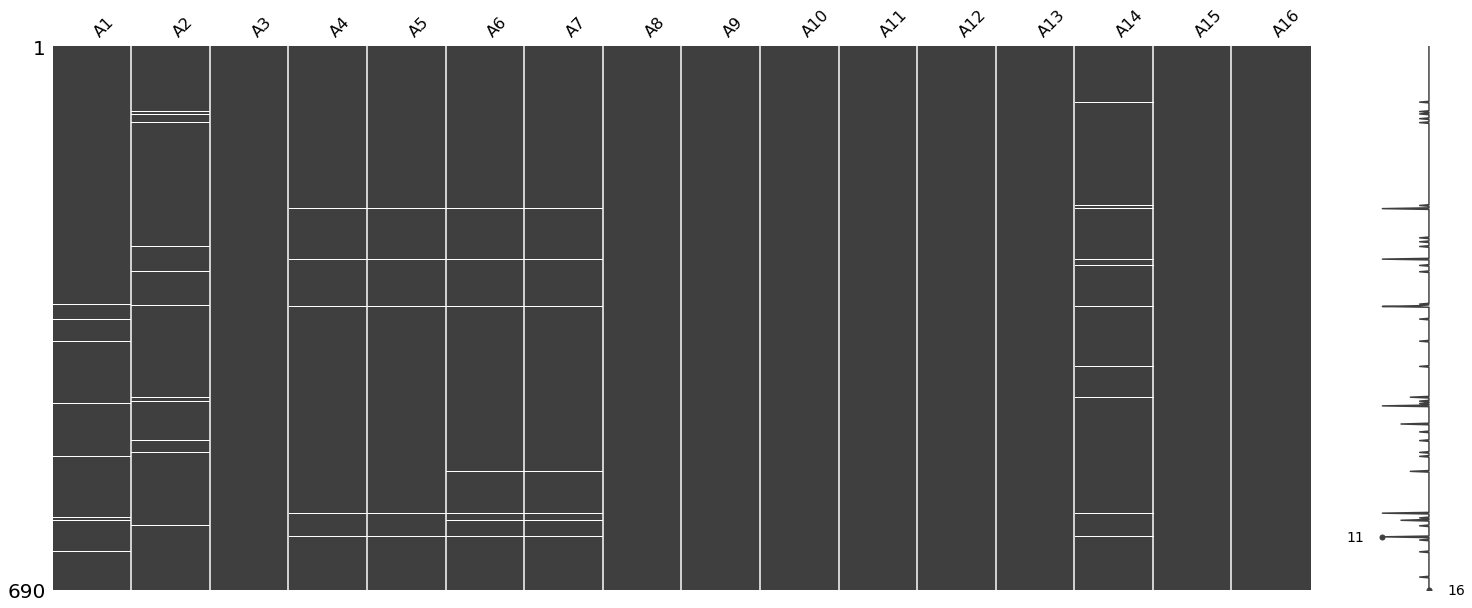

In [7]:
import missingno.missingno as msno
d1 = data.replace('?', np.nan)
print(d1.isnull().sum())
msno.matrix(d1)

Como se puede ver los datos desconocidos solo se encuentran en las variables *A1, A2, A4, A5, A6, A7 y A14* y en algunos casos no contamos con ningún dato entre *A4* y *A7*.
Esto hace que sea muy difícil utilizar estos casos para el entrenamiento. Una opción sería descartar estos casos (en especial aquellos con demasiadas variables desaparecidas), sin embargo en Machine Learning es importante disponer de la mayor cantidad de datos posible y en nuestro caso contamos con un número muy reducido (690 casos), por lo que usaremos otros métodos para aprovechar los datos de los casos con variables desaparecidas.

## SUSTITUCIÓN DE LAS VARIABLES DESAPARECIDAS

Aquí habría que realizar un análsis de los datos númericos, con gráficas a ser posible
y comprobar si hay anomalias, en caso de que las haya habría que sustituir por la mediana,
en caso contrario, por la media.  
Las variables categoricas habría que sustituirlas por el valor más repetido (moda).  

Para poder utilizar los casos con variables desaparecidas utilizaremos distintos métodos y los analizaremos para quedarnos con el que nos ofrezca mejor rendimiento.

### VARIABLES NUMÉRICAS

Comezamos analizando los datos de las variables numéricas con datos incompletos, es decir, la columna A2 y A14. Con esto podremos observar su comportamiento para así saber la mejor forma de tratar a las variables desaparecidas.

Media A2: 31.50381316998472
Mediana A2: 28.42


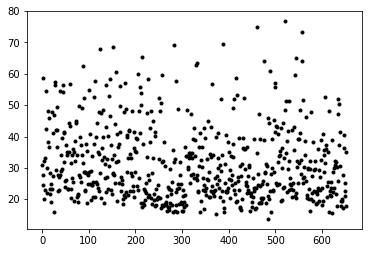

In [8]:
#Eliminamos los casos con variables desaparecidas
d2 = d1.dropna().copy()

#Cambiamos el tipo de A2 a numérico. Pasa a float o int según los datos almacenados.
#Si hay un string salta un error.
d2.loc[:,('A2')] = pd.to_numeric(d2.A2)

#Graficamos los datos
plt.figure()
plt.scatter(np.arange(0,len(d2)), d2.A2, marker='.', c='k')

print('Media A2: '+str(d2.A2.mean()))
print('Mediana A2: '+str(d2.A2.median()))

En este caso, puesto que no hay muchas anomalías en los datos, es más recomendable que sustituyamos las variables desaparecidas por la media de estos.

Media A14: 180.35987748851454
Mediana A14: 160.0


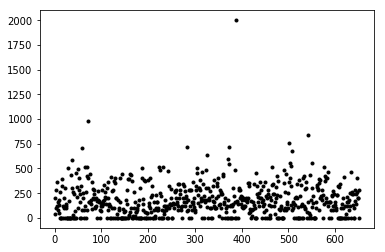

In [9]:
#Cambiamos el tipo de A14 a numérico.
d2.loc[:,('A14')] = pd.to_numeric(d2.A14)

plt.figure()
plt.scatter(np.arange(0,len(d2)), d2.A14, marker='.', c='k')

print('Media A14: '+str(d2.A14.mean()))
print('Mediana A14: '+str(d2.A14.median()))

Sin embargo, en este caso, es menos recomendable que sustituyamos con la media puesto que hay ciertas anomalías en los datos llegando alguno de ellos incluso a 1000 ó 2000 en el eje de las *y*, cuando la mayoría de estos tienen unos valores mucho más bajos.

Comprobamos como han cambiado los datos si sustituimos A2 con la media:

Reemplazando los valores desaparecidos con la media:
Media A2: 31.567051823246135
Mediana A2: 28.625

Diferencia entre las medias A2: 0.06323865326141487
Diferencia entre las medianas A2: 0.2049999999999983


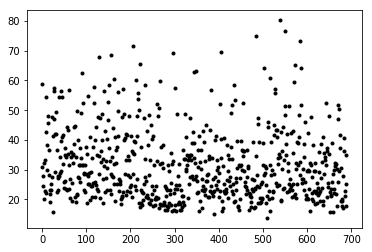

In [10]:
d3 = d1.copy()
d3.A2 = d3.A2.replace(np.nan, d2.A2.mean())
d3.A2 = pd.to_numeric(d3.A2)

plt.figure()
plt.scatter(np.arange(0,len(d3)), d3.A2, marker='.', c='k')

print('Reemplazando los valores desaparecidos con la media:')
print('Media A2: '+str(d3.A2.mean()))
print('Mediana A2: '+str(d3.A2.median()))

print('\nDiferencia entre las medias A2: '+ str(d3.A2.mean() - d2.A2.mean()))
print('Diferencia entre las medianas A2: '+str(d3.A2.median() - d2.A2.median()))

Comprobamos como han cambiado los datos si sustituimos ahora A14 por la mediana:

Reemplazando los valores desaparecidos con la mediana:
Media A14: 183.5623188405797
Mediana A14: 160.0

Diferencia entre las medias A2: 3.202441352065165
Diferencia entre las medianas A2: 0.0


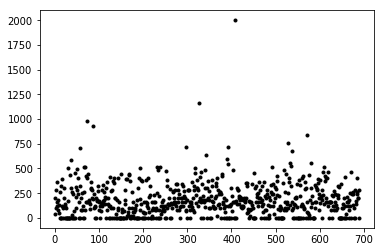

In [11]:
d3.A14 = d3.A14.replace(np.nan, d2.A14.median())
d3.A14 = pd.to_numeric(d3.A14)

plt.figure()
plt.scatter(np.arange(0,len(d3)), d3.A14, marker='.', c='k')

print('Reemplazando los valores desaparecidos con la mediana:')
print('Media A14: '+str(d3.A14.mean()))
print('Mediana A14: '+str(d3.A14.median()))

print('\nDiferencia entre las medias A2: '+ str(d3.A14.mean() - d2.A14.mean()))
print('Diferencia entre las medianas A2: '+str(d3.A14.median() - d2.A14.median()))

### VARIABLES CATEGÓRICAS

Seguimos analizando los datos de las variables categóricas con datos incompletos, es decir, las características A1, A4, A5, A6 y A7. 

La sustitución de estos datos podríamos realizarla de dos maneras: La primera y más lógica sería sustituir los valores desaparecidos por la moda, es decir, el valor que se repita con mayor frecuencia en cada columna. Esto puede ser contraproducente dependiendo de cuántos valores desaparecidos tenga la columna. Si tiene muchos, podríamos realizarla de una segunda manera, basada en crear una nueva clase para estos valores que faltan. Esta estrategia agregará más información al conjunto de datos, lo que dará como resultado un cambio de varianza posterior, cuando tengamos que entrenar nuestro sistema.
Por lo tanto, tenemos que ver que caso nos conviene más para cada característica:

In [12]:
print('A1')
data['A1'].value_counts()

A1


b    468
a    210
?     12
Name: A1, dtype: int64

In [13]:
print('A4')
data['A4'].value_counts()

A4


u    519
y    163
?      6
l      2
Name: A4, dtype: int64

In [14]:
print('A5')
data['A5'].value_counts()

A5


g     519
p     163
?       6
gg      2
Name: A5, dtype: int64

In [15]:
print('A6')
data['A6'].value_counts()

A6


c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: A6, dtype: int64

In [16]:
print('A7')
data['A7'].value_counts()

A7


v     399
h     138
bb     59
ff     57
?       9
z       8
j       8
dd      6
n       4
o       2
Name: A7, dtype: int64

Dado que el número de variables desaparecidas está alrededor de las 6-12, y el número de variables más frecuentes para cada característica sobrepasa en la mayoría de los casos los 400, se va a optar por sustiuir todas estas con la moda, es decir, el valor más frecuente para cada característica.

In [17]:
d3.A1 = d1.replace(np.nan, d2.A1.mode())
d3.A4 = d1.replace(np.nan, d2.A4.mode())
d3.A5 = d1.replace(np.nan, d2.A5.mode())
d3.A6 = d1.replace(np.nan, d2.A6.mode())
d3.A7 = d1.replace(np.nan, d2.A7.mode())

Por tanto, una vez hemos remplazado estos valores, volvemos a mostrar como quedaría nuestro conjunto de datos:

In [18]:
d4 = pd.get_dummies(d3)
d4.head()

,A2,A3,A8,A11,A14,A15,A16,A1_a,A1_b,A4_a,...,A7_b,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.25,1,202.0,0,1,0,1,0,...,1,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43.0,560,1,1,0,1,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280.0,824,1,1,0,1,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100.0,3,1,0,1,0,...,1,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,1,0,1,0,...,1,0,1,1,0,1,0,0,0,1


Cuyas columnas son las siguientes:

In [19]:
d4.columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A16', 'A1_a', 'A1_b', 'A4_a',
       'A4_b', 'A5_a', 'A5_b', 'A6_a', 'A6_b', 'A7_a', 'A7_b', 'A9_f', 'A9_t',
       'A10_f', 'A10_t', 'A12_f', 'A12_t', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')

### COMPROBANDO LA FIABILIDAD DE LOS DATOS

Para asegurarnos de que esta configuración de nuestros datos nos ofrece un buen rendimiento, vamos a realizar un primer entrenamiento con el modelo de *Regresión Logística*, pues ofrece un rendimiento medio y es el más rápido lo que nos permitirá realizar más pruebas. 

Por tanto, comenzamos con este modelo de entrenamiento:

In [20]:
from sklearn.model_selection import train_test_split as tts

Importamos la función *train_test_split*, de *sklearn*, que nos va a permitir separar nuestro conjunto de datos en dos: Uno para entrenar y otro para validar. Con este último mediremos el error de predicción que ofrece nuestro modelo.

In [21]:
x = d4.values[:, d4.columns!='A16']
y = d4['A16'].values

Dividiremos los datos en un 80% (552) de entrenamiento y un 20% (138) de validación pues nuestro conjunto de datos es pequeño y es necesario conservar la mayor cantidad de datos posible para el entrenamiento. Usamos un 20% en lugar de un 10% debido a que el 10% (69 casos) es una cantidad demasiado pequeña para que los porcentajes sean fiables (un caso más o menos clasificado correctamente hace variar el porcentaje total en 1.5%).

Además, la división debe de ser aleatoria, pues algunos casos pueden entrenar mejor que otros, y seleccionar arbitrariamente los casos podría dar lugar a un resultado que no es realista.

In [22]:
xTrain, xVal, yTrain, yVal = tts(x, y, test_size=0.2)

#Porcentaje de casos de validación positivos respecto de los negativos
np.sum(yVal)*100/len(yVal)

41.30434782608695

Pasamos entonces a entrenar nuestro modelo. Para ello definimos las funciones que utilizará la regresión lineal. Estas funciones se explicarán en el apartado correspondiente de *Regresión Logística*.
<a id='def_fun'></a>

In [23]:
g = lambda z: 1 / (1 + np.e**-z)

def safe_ln(x, minval=0.0000000001):
    return np.log(x.clip(min=minval))

def gradient(theta, x, y, lamb):
    grad = 1/len(x) * (x.T).dot(g(x.dot(theta)) - y)
    grad[1:] += (lamb/len(x))*theta[1:]
    return grad

def funCoste(theta, x, y, lamb):
    return -1/len(x) * (((safe_ln( g(x.dot(theta)) )).T).dot(y) +
                        ((safe_ln( 1 - g(x.dot(theta)) )).T).dot(1-y) +
                        (lamb/(2*len(x))*(np.sum(theta[1:]))**2))

def normalizar(x) :
    mu = np.mean(x,0)
    s = np.std(x,0)
    
    x = (x-mu)/s
    
    return (x, mu, s)

Definimos una función que entrene a partir de unos datos dados y nos devuelva el porcentaje de acierto de la validación, también haremos que devuelva el porcentaje de acierto sobre los propios casos de entrenamiento, que nos permitirá ver si existe sobreajuste. 

In [24]:
def trainRegresion(x, y, xVal, yVal, lamb) :
    theta = np.zeros((x.shape[1]))

    result = opt.fmin_tnc(func=funCoste, x0=theta, fprime=gradient, args=(x, y, lamb))
    thetaOpts = result[0]

    yResult = [1 if i >= 0.5 else 0 for i in g(xVal.dot(thetaOpts))]
    valP = (yVal==yResult).sum()/len(yVal)
    
    yResult = [1 if i >= 0.5 else 0 for i in g(x.dot(thetaOpts))]
    trainP = (y==yResult).sum()/len(y)
    
    return(valP * 100, trainP * 100)

In [25]:
trainRegresion(xTrain, yTrain, xVal, yVal, 0)

(89.85507246376811, 84.60144927536231)

Estos porcentajes variarán según la división de los datos, pero siempre rondará el 85% tanto en la validación como en el entrenamiento. También se puede comprobar realizando la media de multiples entrenamientos.

In [26]:
def meanTrainRegresion(x, y, lamb, iteraciones) : 
    train = []
    val = []
    
    for i in range(0, iteraciones) :
        xTrain, xVal, yTrain, yVal = tts(x, y, test_size=0.2)
        
        result = trainRegresion(xTrain, yTrain, xVal, yVal, lamb)
        
        val.append(result[0]) 
        train.append(result[1])
        
    return (np.mean(val), np.mean(train))

In [27]:
meanTrainRegresion(x, y, 0, 500)

(84.96666666666665, 86.29239130434783)

De este modo podemos observar que el modelo acierta casi el 85% de los casos de validación y algo más del 86% de los casos de entrenamiento. Estas cifras podrían considerarse aceptables para considerar que la clasificación es correcta, sin embargo intentaremos ajustar el modelo buscando unos mejores porcentajes. 

Ese 86% de casos de entrenamiento clasificados correctamente nos indica que podría haber un pequeño *underfitting*, es decir, que el modelo no se ajusta del todo a los casos de entrenamiento. Nunca es deseable que ese porcentaje sea del 100% (y en muchos casos es practicamente imposible) pues eso nos llevaría a un problema de *overfitting*, pero intentaremos aplicar medidas contra el *underfitting* para comprobar si los porcentajes mejoran.

Crearemos una función que nos permita ver las curvas de aprendizaje para analizar la bias y la varianza, a esta función le agregaremos un parámetro que nos permita seleccionar el tramo a mostrar para facilitar el análisis:

In [28]:
def curvaAprendizaje(x, y, xval, yval, lamb, ret, intervalo=slice(None)):
    trainError = np.zeros((len(x), 1))
    validationError = np.zeros((len(x), 1))
    
    for i in range(1, len(x) + 1):
        
        theta = np.ones((x.shape[1]))
        norm = normalizar(x)
        x = norm[0]
        result = opt.fmin_tnc(func=funCoste, x0=theta, fprime=gradient, args=(x[0:i], y[0:i], lamb))
        thetaOpts = result[0]
  
        trainError[i-1] = funCoste(thetaOpts, x[0:i], y[0:i], lamb)
 
        xval = (xval-norm[1])/norm[2]
        validationError[i-1] = funCoste(thetaOpts, xval, yval, lamb)
        
    plt.plot(np.arange(1, len(xTrain[intervalo]) + 1), trainError[intervalo], 'b', label = 'Entrenamiento')
    plt.plot(np.arange(1, len(xTrain[intervalo]) + 1), validationError[intervalo], 'r', label = 'Validación')
    plt.xlabel('Número de ejemplos de entrenamiento')
    plt.ylabel('Error')
    plt.legend(loc=0)
    
    if(ret != 0): return (trainError, validationError)
    else: return

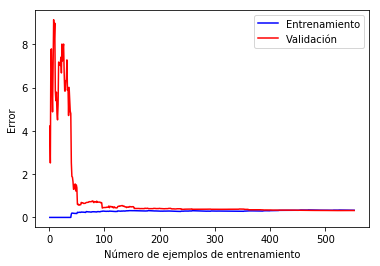

In [29]:
#Salta overflow, pero según he mirado se puede ignorar porque 
#numpy se encarga del overflow haciendo las aproximaciones que necesite
#se pueden ignorar con
np.seterr(over='ignore')
tError, valError = curvaAprendizaje(xTrain, yTrain, xVal, yVal, 0, 1)

In [30]:
a = (valError - tError)
valor = np.argmin(a > 0.75)
valor

50

Para analizar mejor las curvas mostraremos los ejemplos de entrenamiento a partir de *valor*, que es donde las curvas se empiezan a juntar.

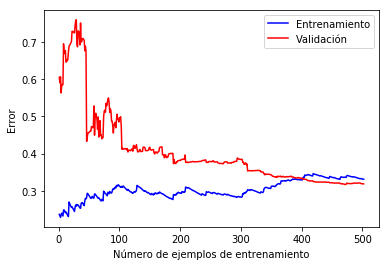

In [31]:
curvaAprendizaje(xTrain, yTrain, xVal, yVal, 0, 0, slice(valor,None))

Como se puede ver las curvas apenas tienen separación e incluso pueden llegar a juntarse (según los valores de entrenamiento/validación obtenidos). Por tanto podemos afirmar que el modelo no tiene mucha varianza y no hay *overfitting*.

Del mismo modo el coste final de las curvas es lo bastante bajo como para confirmar que tampoco hay demasiada bias y se podría afirmar que no existe *underfitting*.

Sin embargo como ya hemos dicho intentaremos mejorar el modelo para comprobar si es posible un mejor resultado.

#### AJUSTAR $\lambda$

Una buena forma de solucionar problemas de *underfitting* y *overfitting* es ajustar la variable $\lambda$, si nuestra $\lambda$ es demasiado grande probablemente nos lleve a un problema de *underfitting*, mientras que si es muy pequeña será de *overfitting*, por tanto, es importante encontrar un $\lambda$ óptima para nuestro modelo.

Para ello vamos a generar una secuencia de 2000 lambdas, que oscilen entre 0 y 100

In [32]:
lambdas = np.linspace(0, 100, 2000)

Con estas lambdas vamos a entrenar nuestro modelo y lo evaluaremos con los datos de validación. Seleccionaremos aquella lambda que máximice el porcentaje de acierto sobre los ejemplos de entrenamiento.

In [33]:
mejor = []
for i in range(0, len(lambdas)):
    mejor.append(trainRegresion(xTrain, yTrain, xVal, yVal, lambdas[i])[0])

In [34]:
mejor = np.array(mejor)
l = lambdas[mejor.argmax()]
l

4.252126063031516

Como podemos ver, el porcentaje de aciertos mejora en cierta medida gracias al $\lambda$ obtenido.

In [35]:
trainRegresion(xTrain, yTrain, xVal, yVal, l)

(90.57971014492753, 85.68840579710145)

In [36]:
media1 = meanTrainRegresion(x, y, l, 500)[0]
media1

85.02608695652172

Si realizamos la curva de aprendizaje en el mismo punto donde antes se juntaban las curvas vemos que hay un menor *gap* entre ellas dos, indicando esto que los datos de validación son capaces de adaptarse mejor a los de entrenamiento. 

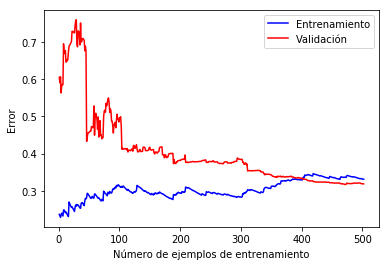

In [37]:
curvaAprendizaje(xTrain, yTrain, xVal, yVal, 0, 0, slice(valor,None))

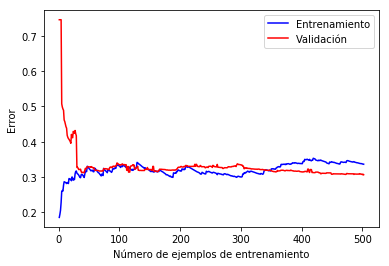

In [38]:
curvaAprendizaje(xTrain, yTrain, xVal, yVal, l, 0, slice(valor, None))

Estos son los resultados obtenidos con las variables categóricas desaparecidas sustituidas mediante la moda. Comprobaremos ahora los resultados con la siguiente configuración.

Como vemos en la distribución de las variables categóricas, la variable A1 tiene tres posibles valores: a, b y ?
Dado que esta ultima aparece solo 12 veces en comparación con los otros dos valores (210 y 468 respectivamente), seguiremos sustiyendola por la moda. 
Sin embargo, para el resto crearemos una nueva clase llamada '?' dado que para todas ellas hay valores que aparecen con menos frecuencia y se han considerado como una clase.

Antes de nada, crearemos una función que realice lo necesario para ajustar $\lambda$ para tener obtener conclusiones de ello después:

In [39]:
def ajustarLamb():
    lambdas = np.linspace(0, 100, 2000)
    mejor = []
    for i in range(0, len(lambdas)):
        mejor.append(trainRegresion(xTrain, yTrain, xVal, yVal, lambdas[i])[0])
        
    mejor = np.array(mejor)
    l = lambdas[mejor.argmax()]
    
    return l

Remplazamos los datos con la nueva configuración:

In [40]:
d3.A1 = d1.replace(np.nan, d2.A1.mode())
d3.A4 = d1.replace(np.nan, '?')
d3.A5 = d1.replace(np.nan, '?')
d3.A6 = d1.replace(np.nan, '?')
d3.A7 = d1.replace(np.nan, '?')

In [41]:
d4 = pd.get_dummies(d3)
x_2 = d4.values[:, d4.columns!='A16']
y_2 = d4['A16'].values
xTrain_2, xVal_2, yTrain_2, yVal_2 = tts(x_2, y_2, test_size=0.2)

Comprobamos que el porcentaje medio obtenido se asemeja mucho a la ya comprobada configuración de datos

In [42]:
meanTrainRegresion(x, y, 0, 500)[0]

85.05797101449275

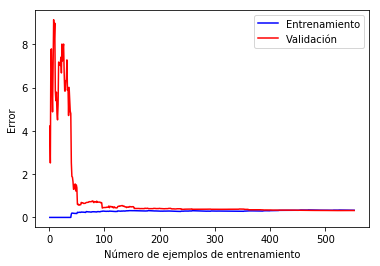

In [43]:
curvaAprendizaje(xTrain, yTrain, xVal, yVal, 0, 0)

In [44]:
l = ajustarLamb()
media2 = meanTrainRegresion(x, y, l, 500)[0]
media2

85.15072463768115

Como vemos, una vez ajustada lambda para las dos configuraciones, se obtienen unos resultados muy parecidos.

In [45]:
print("Atributos sustituidos con la moda: " + str(media1))
print("Atributos sustituidos con una clase nueva: " + str(media2))

Atributos sustituidos con la moda: 85.02608695652172
Atributos sustituidos con una clase nueva: 85.15072463768115


Usaremos aquella configuración de los datos que nos haya proporcionado mejores resultados:

In [46]:
if(media2 > media1):
    x, y, xTrain, yTrain, xVal, yVal = x_2, y_2, xTrain_2, yTrain_2, xVal_2, yVal_2

Una vez tenemos los conjuntos de entrenamiento y validación procederemos a analizar los 3 métodos de entrenamiento: **Regresión Logística**, **Redes Neuronales** y **Support Vector Machine**.

# REGRESIÓN LOGÍSTICA

Comenzamos con la regresión logística, este método requiere que definamos las funciones necesarias para los cálculos matemáticos. El método consiste en utilizar el gradiente de una función de costo para encontrar el mínimo (global, a ser posible, aunque en ciertos casos puede llevar a sobreajuste) de la función, para esto se utilizan unos valores $\theta$ que se multiplican por la matriz de entrenamiento $X$ y los cuales se van ajustando hasta hallar el mínimo.

Estas formulas ya fueron definidas en la entrada *In [23]*, en el apartado anterior, dado que se utilizó la regresión logística para las pruebas. Sin embargo explicaremos las mismas:

Comenzamos con definir la función *g*, que será nuestra función de hipótesis y que responde a la siguiente fórmula: 

$$g(z) = \frac{1}{1 + e^{-z}}$$

También necesitaremos la función de costo, definida matemáticamente como:

$$J(\theta) = - \frac{1}{m}{( (log(g(X\theta) ))^{T}y) + (log(1 - g(X\theta)))^{T}(1-y)} + \frac{\lambda}{2m}\sum^n_{j=1}\theta^2_j$$


Esta función la usaremos para buscar el mínimo, que será el punto en el cual nuestro algoritmo esté optimizado. Para encontrar el mínimo será necesaria la derivada de la función: el gradiente.

$$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}{ X^{T} (g(X\theta) - y)} \quad  para\  j=0$$

$$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}{ X^{T} (g(X\theta) - y)} + \frac{\lambda}{m}\theta_j \quad  para\  j\ge1$$


Además, añadiremos una función *safe_ln* que nos ayudará a evitar que el logaritmo de $1-g(X\theta)$ de error cuando $g(X\theta)$ sea 1 en algún caso.


Para evitar problemas de overflow también definiremos una función *normalizar*, que normalizará los datos dados y devolverá la matriz normalizada junto a la media y la desviación estandar utilizadas para la misma.

Vamos a entrenar con este método para obtener un porcentaje de acierto y compararlo posteriormente con el resto de algoritmos. Además de obtener el score también calcularemos el tiempo de ejecución, por lo que usaremos la librería *time* para ello:

In [47]:
import time

In [48]:
tic = time.process_time()      

scoreRegresion = trainRegresion(xTrain, yTrain, xVal, yVal, l)[0]

toc = time.process_time()

timeRegresion = toc - tic

print("Score: " + str(scoreRegresion))
print("Tiempo de ejecución: " + str(timeRegresion))

Score: 84.05797101449275
Tiempo de ejecución: 0.015625


# REDES NEURONALES

Seguiremos usando una red neuronal para clasificar nuestros datos. Este método busca simular el comportamiento de las neuronas en el cerebro y utiliza una serie de capas con un conjunto de nodos (neuronas) en cada una, junto a unas matrices de pesos, para la clasificación. Las capas se dividen en:  
* **Capa de entrada**: Que recibirá los datos de entrada y, por tanto, tendrá tantos nodos como variables tengan nuestros datos.  
* **Capa oculta**: La cual, utilizando una matriz de pesos sobre la capa de entrada, contendrá una transformación de los datos de entrada, que serán una aproximación intermedia entre la entrada y la clasificación final (la salida). Esta capa puede tener los nodos que se deseen, pero lo más común es que se encuentren entre el tamaño de entrada y de salida.

* **Cada de salida**: Una transformación de la capa oculta (a partir de otra matriz de pesos), que ofrece la clasificación final. La cantidad de nodos dependerá del modelo, si se trata de una clasificación multi-clase será necesario tener un nodo por clase, indicando la probabilidad de pertenencia a cada clase (aunque también se podría usar un solo nodo que indicase la clase con mayor probabilidad), mientras que en otro caso solo hará falta un nodo, ya sea para indicar la probabilidad de afirmativo/negativo (como en nuestro caso), como para obtener una predicción numérica.

La red neuronal puede tener múltiples capas ocultas (lo que se conoce como deep-learning), y es una práctica necesaria en clasificaciones complejas como reconocimiento de imágenes y de voz, sin embargo en clasificaciones más simples como la nuestra bastará con una capa.

El entrenamiento de la red neuronal es similar al de la regresión logística: definimos unas funciones de coste y gradiente y minimizamos las matrices de pesos ($\theta s$) mediante una función *minimize*.  
Para entrenar la red neuronal necesitaremos definir nuevas funciones de hipótesis, coste y gradiente que sean capaces de utilizar las matrices de pesos.

## HIPÓTESIS

Es la encargada de crear la red neuronal y devolver un resultado:

In [49]:
dg = lambda z: g(z) * (1 - g(z))
g = lambda z: 1 / (1 + np.exp(-z))

def h(theta1, theta2, x):
    #La matriz X son las unidades pertenecientes a la capa de entrada
    one = np.ones((len(x), 1))
    #Añadimos a la matriz X la columna de 1's para obtener las unidades de la capa 1
    a1 = np.hstack([one, x])
    
    #Obtenemos un resultado para las unidades de la capa oculta gracias a theta1
    a2 = g(a1.dot(theta1.T))
    #Añadimos la columna de 1's a la segunda capa
    a2 = np.hstack([one, a2])
    
    #Obtenemos un resultado para las unidades de la capa de salida gracias a theta2
    a3 = g(a2.dot(theta2.T)) 
    
    return a3

## FUNCIÓN DE COSTE

Dada por la siguiente expresión matemática:


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}[  -y^{(i)}_k  log((h_\theta(x^{(i)}))_k) - (1 - y^{(i)}_k) log(1 - (h_\theta(x^{(i)}))_k)  ] $$

In [50]:
def funCosteRed(theta1, theta2, x, y, num_etiquetas):
    yk = np.zeros((len(x), num_etiquetas))
    for k in range(1, num_etiquetas + 1):
        yaux = np.where(y == k, 1, 0)
        yk[:, k-1] = yaux.ravel()
        
    h_result = h(theta1, theta2, x)
    
    yaux = (np.log( h_result) * yk) + (np.log( 1 - h_result ) * (1-yk))

    return -1/len(x) * yaux.sum()

Y su versión regularizada:

$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}[  -y^{(i)}_k   log((h_\theta(x^{(i)}))_k) - (1 - y^{(i)}_k)  log(1 - (h_\theta(x^{(i)}))_k)  ] + \frac{\lambda}{2m}[\sum_{j=1}^{N}\sum_{k=1}^{M}(\theta^{(1)}_{j,k})^{2} + \sum_{j=1}^{P}\sum_{k=1}^{Q}(\theta^{(2)}_{j,k})^{2} ] $$

In [51]:
def funCosteReg(theta1, theta2, x, y, num_etiquetas, lamb):    
    coste = funCosteRed(theta1, theta2, x, y, num_etiquetas)    
        
    return coste + (lamb/(2*len(x)))*(np.sum(theta1[:,1:]**2) + np.sum(theta2[:, 1:]**2))

## GRADIENTE

In [52]:
def gradienteRed(x, y, theta1, theta2, num_etiquetas) : 
    delta1 = np.zeros((len(theta1), theta1[0].size))
    delta2 = np.zeros((len(theta2), theta2[0].size))

    
    yk = np.zeros((len(x), num_etiquetas))
    for k in range(1, num_etiquetas + 1):
        yaux = np.where(y == k, 1, 0)
        yk[:, k-1] = yaux.ravel()
        
    for i in range(0, len(x)):
        a1, a2, a3, z2 = salidaCapas(theta1, theta2, x[i,:])

        d3 = (a3 - yk[i])
        
        z2 = np.append(1, z2)
        d2 = (theta2.T).dot(d3)*dg(z2)
    
        d2 = np.delete(d2, 0)
        
        delta1 += np.matmul(d2[:,np.newaxis],a1[np.newaxis,:])
        delta2 += np.matmul(d3[:,np.newaxis],a2[np.newaxis,:])
        
    D1 = delta1/len(x)
    D2 = delta2/len(x)
        
    return np.concatenate((D1.ravel(), D2.ravel()))

Para calcular el gradiente necesitaremos también la función *salidaCapas*, una redefinición de la función de hipótesis que nos devolverá los valores de todas las capas junto a *z2*, que es la multiplicación de $\theta^{(1)}x$, es decir la multiplicación de la primera matriz de pesos (la que hay entre la capa de entrada y la oculta) y los datos de entrada.

In [53]:
def salidaCapas(theta1, theta2, x):
    
    #Añadimos al vector X un 1
    a1 = np.append(1, x)
    
    z2 = a1.dot(theta1.T)
    #Obtenemos un resultado para las unidades de la capa oculta gracias 
    #a theta1
    a2 = g(z2)

    #Añadimos un 1 al principio del vector de la segunda capa
    a2 = np.append(1, a2)
    
    z3 = a2.dot(theta2.T)
    #Obtenemos un resultado para las unidades de la capa de salida gracias 
    #a theta2
    a3 = g(z3) 
    
    return (a1,a2,a3,z2)

Dado que a las matrices de pesos se pasarán como parámetro mediante un solo vector, necesitaremos una función *despliega* que nos permita separar ambas matrices. Este vector se debe a que las función *minimize* de *scipy.optimize* solo permite minimizar un único parametro, crear este vector nos da la posibilidad de optimizar los pesos de multiples matrices como si fuesen un único parámetro.

In [54]:
def despliega(params_rn, num_entradas=25, num_ocultas=10, num_etiquetas=1):
    
    theta1 = np.reshape ( params_rn [:num_ocultas * (num_entradas + 1)],
    (num_ocultas, (num_entradas + 1)) )
    
    theta2 = np.reshape ( params_rn [num_ocultas * (num_entradas + 1):],
    (num_etiquetas, (num_ocultas + 1)) )
    
    return (theta1, theta2)

Finalmente definimos *costeRN*, que devuelve una tupla con el coste y el gradiente, esta es la función que utilizará *minimize* para realizar los cálculos. Recibirá el vector de $\theta s$ mediante el parámetro *params_rn* y, mediante la función *despliega* y los tamaños de las capas lo convertirá en dos matrices.

In [55]:
def costeRN(params_rn, num_entradas, num_ocultas, num_etiquetas, X, y, reg) :
    theta1, theta2 = despliega(params_rn, num_entradas, num_ocultas, num_etiquetas)

    coste = funCosteReg(theta1, theta2, X, y, num_etiquetas, reg)
    gradient = gradienteRed(X, y, theta1, theta2, num_etiquetas)
    
    delta1, delta2 = despliega(gradient, num_entradas, num_ocultas, num_etiquetas)
                
    delta1[:, 1:] += (theta1[:, 1:] * reg/len(X))
    delta2[:, 1:] += (theta2[:, 1:] * reg/len(X))
    
    gradient = np.concatenate((delta1.ravel(), delta2.ravel()))
    
    return (coste,gradient)

Para entrenar la red neuronal inicializaremos las matrices de pesos con unos valores aleatorios dentro del intervalo ($\epsilon_{ini}$)determinado por:
$$\epsilon=\frac{\sqrt{6}}{\sqrt{L_{in}+{L_{out}}}}$$  
Donde $in$ es la capa que usa la matriz de pesos para transformarse en $out$ y $L_{in}$ y $L_{out}$ son los tamaños de dichas capas.  
De este modo en cada entrenamiento las matrices iniciales serán distintas, lo que nos permitirá encontrar distintos valores y quedarnos con los que nos ofrezcan mejores resultados.

In [56]:
def pesosAleatorios(L_in, L_out):
    Eini = (6**(1/2.0))/(L_in+L_out)**(1/2.0)
    return np.random.uniform(-Eini, Eini, (L_in, L_out))

Para terminar, definimos una función *trainRN* que será la encargada de realizar el entrenamiento y la validación. Esta función recibe el valor de regulación *lamb*, el tamaño de las capas de entrada y oculta en un vector/tupla y los datos de entrenamiento y validación en una tupla, además también dispone de un parámetro para seleccionar el número de iteraciones que se desean usar para el entrenamiento (cuantas más iteraciones más se ajustará a los datos de entrenamiento, pero podría generar sobreajuste). 

La función devolverá una tupla con los porcentajes de acierto en la validación y entrenamiento en una tupla y las matrices de pesos en un vector.

In [57]:
def trainRN(lamb, capas, datos, iteraciones=70):
    xTrain, yTrain, xVal, yVal = datos
    thetaRnd1 = pesosAleatorios(capas[0]+1, capas[1])
    thetaRnd2 = pesosAleatorios(capas[1]+1, 1)
    thetaRnd = np.r_[thetaRnd1.ravel(), thetaRnd2.ravel()]
    xP = normalizar(xTrain)
    fmin = opt.minimize(costeRN, thetaRnd, args=(capas[0],capas[1],1, xTrain, yTrain, lamb), 
                        method='TNC', options={'maxiter': iteraciones}, jac=True)
    
    optTheta = fmin.x
   
    theta1, theta2 = despliega(optTheta, capas[0], capas[1], 1)
    
    xval = (xVal-xP[1])/xP[2]
    probabilidades = h(theta1, theta2, xVal)

    
    probabilidades = [1 if i >= 0.5 else 0 for i in probabilidades]

    #Vector de booleanos
    correctos = np.where(probabilidades == yVal)

    porcentajeVal = (len(correctos[0]))*100/len(probabilidades)
    
    #Clasificacion entrenamiento
    probabilidades = h(theta1, theta2, xTrain)
    probabilidades = [1 if i >= 0.5 else 0 for i in probabilidades]

    correctos = np.where(probabilidades == yTrain)

    porcentajeTrain = (len(correctos[0]))*100/len(probabilidades)
    
    return ((porcentajeVal,porcentajeTrain), optTheta)

Una vez tenemos todas las funciones empezaremos el entrenamiento. Empezaremos con un valor de regulación de $0.1$ y $500$ iteraciones.

In [58]:
capas = [xTrain.shape[1], 20]
datos = (xTrain, yTrain, xVal, yVal)
trainRN(0.1, capas, datos, 500)[0]

(82.6086956521739, 90.21739130434783)

Para intentar mejorar este porcentaje analizaremos el porcentaje de acierto generando las curvas de aprendizaje en base al número de iteraciones mediante una función *curvaIteraciones*. Esta función nos devolverá el número de iteraciones óptimo para nuestro modelo.

In [59]:
def curvaIteraciones (x, y, xval, yval, lamb, capas, iteraciones, intervalo=slice(None)) :
    trainError = np.zeros((len(iteraciones), 1))
    validationError = np.zeros((len(iteraciones), 1))
    
    for i in range(0, len(iteraciones)):    
        validationError[i], trainError[i] = trainRN(lamb, capas, (x,y,xval,yval), iteraciones[i])[0]
        
    validationError /= 100
    trainError /= 100  
        
    plt.plot(iteraciones, trainError[intervalo], 'b', label = 'Entrenamiento')
    plt.plot(iteraciones, validationError[intervalo], 'r', label = 'Validación')
    plt.xlabel('Número de iteraciones')
    plt.ylabel('Score')
    plt.legend(loc=0)
    
    return iteraciones[validationError.argmax()]

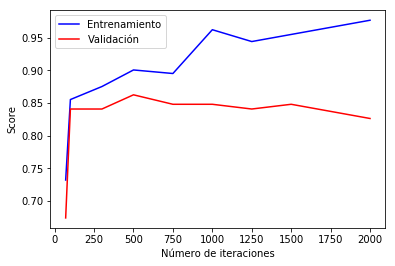

In [60]:
it = [70, 100, 300, 500, 750, 1000, 1250, 1500, 2000]
bestIt = curvaIteraciones(xTrain, yTrain, xVal, yVal, 0.1, capas, it)

In [61]:
bestIt

500

Como se puede observar el porcentaje de acierto sobre los datos de entrenamiento aumenta con el número de iteraciones, sin embargo, el porcentaje de validación parece descender llegado un máximo de iteraciones, esto significa que a partir de ese punto hay sobreajuste, por lo que tendremos que usar un número de iteraciones menor.

Otro modo de mejorar el porcentaje de acierto podría ser aumentar/disminuir el número de nodos de la capa oculta, para comprobarlo crearemos otra función que nos muestre las curvas de aprendizaje en base al número de nodos. Esta función nos devolverá el mejor número de nodos internos para nuestro modelo.

In [62]:
def curvaNodos(x, y, xval, yval, lamb, capas, iteraciones, nodos, intervalo=slice(None)) :
    trainError = np.zeros((len(nodos), 1))
    validationError = np.zeros((len(nodos), 1))
    
    for i in range(0, len(nodos)):
        capas[1] = nodos[i]
        validationError[i], trainError[i] = trainRN(lamb, capas, (x,y,xval,yval), iteraciones)[0]
        
    validationError /= 100
    trainError /= 100  
        
    plt.plot(nodos, trainError[intervalo], 'b', label = 'Entrenamiento')
    plt.plot(nodos, validationError[intervalo], 'r', label = 'Validación')
    plt.xlabel('Número de nodos')
    plt.ylabel('Score')
    plt.legend(loc=0)
    
    return nodos[validationError.argmax()]

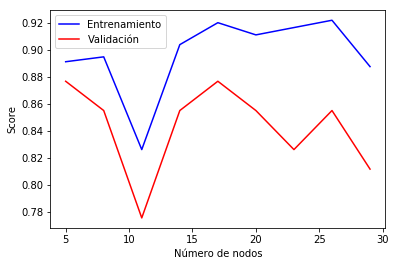

In [63]:
nodos = np.arange(5, 30, 3)
bestNodo = curvaNodos(xTrain, yTrain, xVal, yVal, 0.1, capas, 500, nodos)

In [64]:
bestNodo

5

Una vez tenemos el mejor número de nodos y el mejor número de iteraciones, tenemos que encontrar el valor óptimo para el parámetro $\lambda$. Para ello implementamos la función *mejorAprendizaje*. Esta función realiza *(iteraciones_bucle x lamb.size)* entrenamientos, para asegurarnos de encontrar el mejor resultado posible, ya que con cada entrenamiento las $\theta$'s se generan de manera aleatoria por lo que llegamos a diferentes resultados dependiendo de estas.
Esta función devuelve el mejor porcentaje de acierto, el tiempo de ejecución del entrenamiento en cuestión y la $\lambda$ utilizada para ello. 

In [65]:
def mejorAprendizaje(iteraciones_bucle, lamb, iteraciones_aprendizaje, capas, datos) :
    mejorTotal = 0
    
    for l in lamb :
        mejorP = 0
        for i in range(0, iteraciones_bucle+1) :
            
            tic = time.process_time()
            ap = trainRN(l, capas, datos, iteraciones_aprendizaje)[0]
            toc = time.process_time()
            timeRN = toc - tic
            
            if mejorP < ap[0] :
                mejorP = ap[0]
                mejorParcial = (ap[0], timeRN, l)
        
        if mejorTotal < mejorP :
            mejorTotal = mejorP
            mejor = mejorParcial
               
    return mejor

Elegimos una secuencia de lambdas a probar y establecemos el número óptimo de nodos previamente calculado.

In [66]:
lambdas = [0.1, 0.03, 0.01, 1, 3, 5, 10]
capas[1] = bestNodo

In [67]:
scoreRN, timeRN, lamb = mejorAprendizaje(20, lambdas, bestIt, capas, datos)

In [68]:
lamb

0.01

In [69]:
print("Score: " + str(scoreRN))
print("Tiempo de ejecución: " + str(timeRN))

Score: 89.1304347826087
Tiempo de ejecución: 46.375


# SUPPORT VECTOR MACHINES

Finalizaremos con la SVM (Support Vector Machines). Para esto usaremos la libreria de sklearn *svm*. Tenemos que obtener un clasificador mediante la clase SVC con un kernel y un valor de regularización. Ajustaremos nuestros casos de entrenamiento mediante la función *fit* y, finalmente, gracias a la función *score* podremos validar nuestros casos de validación y obtener el porcentaje de acierto. 

In [70]:
import sklearn.svm as svm

## KERNEL

El kernel escogido debe ser uno lineal ya que, como hemos estudiado en la asignatura, es más recomendable usarlo frente uno Gaussiano en estos conjuntos de datos en los que el número de ejemplos de entrenamiento es pequeño y el número de variables es grande.

Recordamos que nuestro conjunto de datos ronda las 30 características dependiendo de la configuración de variables categóricas establecida finalmente

In [71]:
x.shape

(690, 29)

## PARÁMETRO DE REGULACIÓN *C* 

Para conseguir un buen parámetro C de regulación, vamos a crear una función que entrene nuestro modelo varias veces y se quede con el mejor parámetro:

In [72]:
def ajustarC(valores, x, y, xval, yval):
    mejor = 0
    
    for c in valores :
        clf = svm.SVC(kernel='linear', C=c)
        clf.fit(x, y)
        porcent = clf.score(xval, yval)
        
        if(mejor < porcent) :
            mejor = porcent
            tupla = (c, mejor)

    return tupla

In [73]:
val = np.linspace(0.01, 10, 20)
val

array([ 0.01      ,  0.53578947,  1.06157895,  1.58736842,  2.11315789,
        2.63894737,  3.16473684,  3.69052632,  4.21631579,  4.74210526,
        5.26789474,  5.79368421,  6.31947368,  6.84526316,  7.37105263,
        7.89684211,  8.42263158,  8.94842105,  9.47421053, 10.        ])

In [74]:
c = ajustarC(val, xTrain, yTrain, xVal, yVal)[0]

In [115]:
tic = time.process_time() 

clf = svm.SVC(kernel='linear', C=c)
clf.fit(xTrain, yTrain)
scoreSVM = clf.score(xVal, yVal)
scoreSVM *= 100

toc = time.process_time()

timeSVM = toc - tic

print("Score: " + str(scoreSVM))
print("Tiempo de ejecución: " + str(timeSVM))

Score: 87.68115942028986
Tiempo de ejecución: 40.953125


# CONCLUSIONES

In [153]:
def plotConclusion(tiempo, score):
    grupos = 3
    means_time = tiempo
    means_score = score

    index = np.arange(grupos)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, means_time, bar_width, alpha=opacity, color='b', label='Time')

    rects2 = plt.bar(index + bar_width, means_score, bar_width, alpha=opacity, color='g', label='Score')
    
    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.title('Score by model')
    plt.xticks(index + bar_width, ('RL', 'RN', 'SVM'))
    y_pos = np.arange(0, 101, 10)
    plt.yticks(y_pos)
    plt.legend(loc=6)

    plt.show()

In [154]:
t = (timeRegresion, timeRN, timeSVM)
s = (scoreRegresion, scoreRN, scoreSVM)

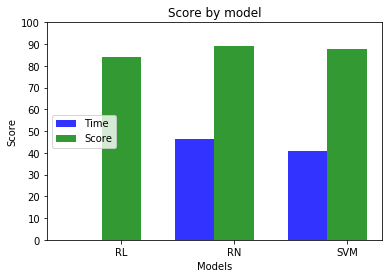

In [155]:
plotConclusion(t, s)

# BIBLIOGRAFÍA

* https://www.coursera.org/learn/machine-learning
* https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce  
* https://www.analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/
* https://github.com/ResidentMario/missingno
